Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

Task #1: Merging 12 months of sales data into a single file

In [2]:
# Loading all csvs into dataframes
"""
jan2019SalesData = pd.read_csv("Sales_Data/Sales_January_2019.csv")
feb2019SalesData = pd.read_csv("Sales_Data/Sales_February_2019.csv")
mar2019SalesData = pd.read_csv("Sales_Data/Sales_March_2019.csv")
apr2019SalesData = pd.read_csv("Sales_Data/Sales_April_2019.csv")
may2019SalesData = pd.read_csv("Sales_Data/Sales_May_2019.csv")
jun2019SalesData = pd.read_csv("Sales_Data/Sales_June_2019.csv")
jul2019SalesData = pd.read_csv("Sales_Data/Sales_July_2019.csv")
aug2019SalesData = pd.read_csv("Sales_Data/Sales_August_2019.csv")
sep2019SalesData = pd.read_csv("Sales_Data/Sales_September_2019.csv")
oct2019SalesData = pd.read_csv("Sales_Data/Sales_October_2019.csv")
nov2019SalesData = pd.read_csv("Sales_Data/Sales_November_2019.csv")
dec2019SalesData = pd.read_csv("Sales_Data/Sales_December_2019.csv")
"""

'\njan2019SalesData = pd.read_csv("Sales_Data/Sales_January_2019.csv")\nfeb2019SalesData = pd.read_csv("Sales_Data/Sales_February_2019.csv")\nmar2019SalesData = pd.read_csv("Sales_Data/Sales_March_2019.csv")\napr2019SalesData = pd.read_csv("Sales_Data/Sales_April_2019.csv")\nmay2019SalesData = pd.read_csv("Sales_Data/Sales_May_2019.csv")\njun2019SalesData = pd.read_csv("Sales_Data/Sales_June_2019.csv")\njul2019SalesData = pd.read_csv("Sales_Data/Sales_July_2019.csv")\naug2019SalesData = pd.read_csv("Sales_Data/Sales_August_2019.csv")\nsep2019SalesData = pd.read_csv("Sales_Data/Sales_September_2019.csv")\noct2019SalesData = pd.read_csv("Sales_Data/Sales_October_2019.csv")\nnov2019SalesData = pd.read_csv("Sales_Data/Sales_November_2019.csv")\ndec2019SalesData = pd.read_csv("Sales_Data/Sales_December_2019.csv")\n'

In [3]:
"""
# merging all 12 dataframes into a dataframe called all sales data
salesData2019 = pd.concat([jan2019SalesData, feb2019SalesData, mar2019SalesData, apr2019SalesData, may2019SalesData, jun2019SalesData, jul2019SalesData, aug2019SalesData, sep2019SalesData, oct2019SalesData, nov2019SalesData, dec2019SalesData])
"""

'\n# merging all 12 dataframes into a dataframe called all sales data\nsalesData2019 = pd.concat([jan2019SalesData, feb2019SalesData, mar2019SalesData, apr2019SalesData, may2019SalesData, jun2019SalesData, jul2019SalesData, aug2019SalesData, sep2019SalesData, oct2019SalesData, nov2019SalesData, dec2019SalesData])\n'

In [4]:
# Loading all csvs into dataframes in a smarter way
files = [f for f in listdir("./Sales_Data") if isfile(join("./Sales_Data", f))]
all_months_data = pd.DataFrame()

for file in files:
    all_months_data = pd.concat([all_months_data, pd.read_csv("./Sales_Data/" + file)])

all_months_data.to_csv("all_data.csv", index = False)

In [5]:
# Read in the all data
all_data = pd.read_csv("all_data.csv")
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


### Question 1: What was the best month for sales? How much was earned that month?

In [6]:
# Clean the data, remove all rows that contain at least one NaN
nan_df = all_data[all_data.isna().any(axis = 1)]
cleaned_data = all_data.drop(nan_df.index)

In [7]:
# Step 1 Extract the month as new column, month
cleaned_data["Month"] = cleaned_data["Order Date"].str[0: 2]
print(cleaned_data["Month"].unique())

['04' '05' 'Or' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [8]:
# Remove rows where row["Month"] == 'Or'
monthOrRows = cleaned_data[cleaned_data["Month"] == 'Or']
cleaned_data = cleaned_data.drop(monthOrRows.index)

In [9]:
# Converting Month column to int type
cleaned_data["Month"] = cleaned_data["Month"].astype("int32")
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
# Create a sales column which is calculated by multiplying 'Price Each' with 'Quantity Ordered'
cleaned_data["Price Each"] = cleaned_data["Price Each"].astype('float')
cleaned_data["Quantity Ordered"] = cleaned_data["Quantity Ordered"].astype('int32')
cleaned_data["sales"] = cleaned_data["Price Each"] * cleaned_data["Quantity Ordered"]
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
# Step 2 Group the sales data by months and sum them up
summarized_sales_by_month = cleaned_data.groupby('Month').sum()[['sales']]
print(summarized_sales_by_month)

            sales
Month            
1      1822256.73
2      2202022.42
3      2807100.38
4      3390670.24
5      3152606.75
6      2577802.26
7      2647775.76
8      2244467.88
9      2097560.13
10     3736726.88
11     3199603.20
12     4613443.34


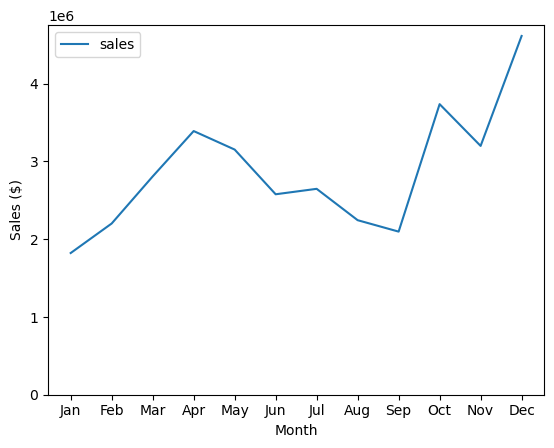

In [12]:
summarized_sales_by_month.plot(kind = "line")
plt.ylabel("Sales ($)")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(ymin = 0)
plt.show()

In [13]:
# Step 3 Order the data by total sales, in descending order
summarized_sales_by_month_ordered = summarized_sales_by_month.sort_values('sales', ascending = False)
print(summarized_sales_by_month_ordered)

            sales
Month            
12     4613443.34
10     3736726.88
4      3390670.24
11     3199603.20
5      3152606.75
3      2807100.38
7      2647775.76
6      2577802.26
8      2244467.88
2      2202022.42
9      2097560.13
1      1822256.73


In [14]:
summarized_sales_by_month['prev month'] = summarized_sales_by_month.index - 1
summarized_sales_by_month.head()

,sales,prev month
Month,,
1,1822256.73,0
2,2202022.42,1
3,2807100.38,2
4,3390670.24,3
5,3152606.75,4


In [15]:
calPercentageChange = summarized_sales_by_month.merge(summarized_sales_by_month, how = "left", left_on = 'prev month', right_index = True, suffixes = ('_curMonth', '_prevMonth'))
calPercentageChange = calPercentageChange.loc[:, ['sales_curMonth', 'sales_prevMonth']]
calPercentageChange['percentageChange'] = round(((calPercentageChange['sales_curMonth'] - calPercentageChange['sales_prevMonth'])/calPercentageChange['sales_prevMonth'])*100, 2)
print(calPercentageChange)

       sales_curMonth  sales_prevMonth  percentageChange
Month                                                   
1          1822256.73              NaN               NaN
2          2202022.42       1822256.73             20.84
3          2807100.38       2202022.42             27.48
4          3390670.24       2807100.38             20.79
5          3152606.75       3390670.24             -7.02
6          2577802.26       3152606.75            -18.23
7          2647775.76       2577802.26              2.71
8          2244467.88       2647775.76            -15.23
9          2097560.13       2244467.88             -6.55
10         3736726.88       2097560.13             78.15
11         3199603.20       3736726.88            -14.37
12         4613443.34       3199603.20             44.19


### Question 2: What City Has the Highest Number of Sales

In [57]:
# Step 1: Create City and State Column
cleaned_data["city"] = cleaned_data["Purchase Address"].str.split(", ").str[-2]
cleaned_data["state"] = cleaned_data["Purchase Address"].apply(lambda x: x.split(", ")[-1].split(" ")[0])
print(cleaned_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

          city state  
0       Dallas    TX  
2       Boston    MA  
3  Los Angeles    CA  
4  Los Angeles    CA  
5  Los 

In [ ]:
# Video method of creating city and state column
"""
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

cleaned_data["city"] = cleaned_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
"""
# This code is a lot cleaner

In [58]:
# Step 2: Group data by city and sum sales
sales_by_city = cleaned_data.groupby(["state", "city"]).sum(numeric_only = True)[["sales"]]
print(sales_by_city.head())

                          sales
state city                     
CA    Los Angeles    5452570.80
      San Francisco  8262203.91
GA    Atlanta        2795498.58
MA    Boston         3661642.01
ME    Portland        449758.27


In [59]:
# Step 3: Sort data by sales in descending order
sales_by_city_desc = sales_by_city.sort_values("sales", ascending = False)
print(sales_by_city_desc)

                          sales
state city                     
CA    San Francisco  8262203.91
      Los Angeles    5452570.80
NY    New York City  4664317.43
MA    Boston         3661642.01
GA    Atlanta        2795498.58
TX    Dallas         2767975.40
WA    Seattle        2747755.48
OR    Portland       1870732.34
TX    Austin         1819581.75
ME    Portland        449758.27


In [60]:
sales_by_city_desc_index_list = list(sales_by_city_desc.index)

In [61]:
label_list = []
for i in sales_by_city_desc_index_list:
    label_list.append(i[1] + " " + i[0])
print(label_list)

['San Francisco CA', 'Los Angeles CA', 'New York City NY', 'Boston MA', 'Atlanta GA', 'Dallas TX', 'Seattle WA', 'Portland OR', 'Austin TX', 'Portland ME']


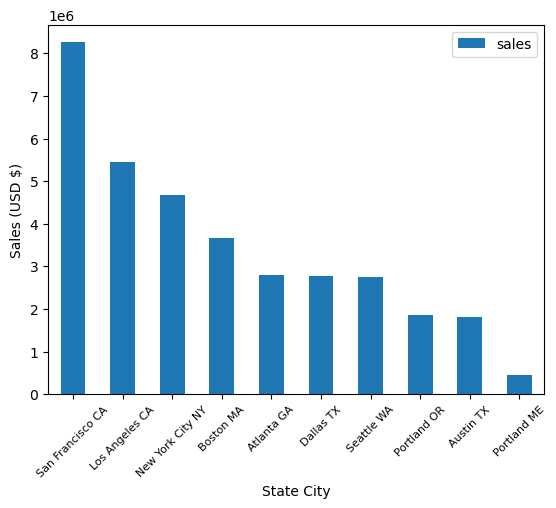

In [63]:
# Step 4: Plot the data in bar chart
sales_by_city_desc.plot(kind = "bar", y = "sales", use_index = True)
plt.xticks(range(0, len(label_list)), label_list ,rotation = 45, size = 8)
plt.ylabel("Sales (USD $)")
plt.xlabel("State City")
plt.show()

### Question 3 What time should we display advertisments to maximize likelihood of customer's buying product?

In [64]:
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [80]:
# Create the column which record the purchasing hour

def getOrderTime(orderDate):
    return orderDate.split(" ")[-1].split(":")[0]

cleaned_data["time (hour)"] = cleaned_data["Order Date"].apply(lambda x: getOrderTime(x)).astype('int')
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,state,time,time (hour)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,08:46,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22:30,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14:38,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14:38,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,09:27,9


In [ ]:
# Video way of converting order date into date time object and get hour
"""
cleaned_data["Order Date"] = pd.to_datetime(cleaned_data["Order Date"])
cleaned_data["Hour"] = cleaned_data["Order Date"].dt.hour
cleaned_data["Minute"] = cleaned_data["Order Date"].dt.minute
"""

In [81]:
# Count the number of total sales made at different hours

buy_freq_diffTime = cleaned_data.groupby("time (hour)").size()
print(buy_freq_diffTime)

time (hour)
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64


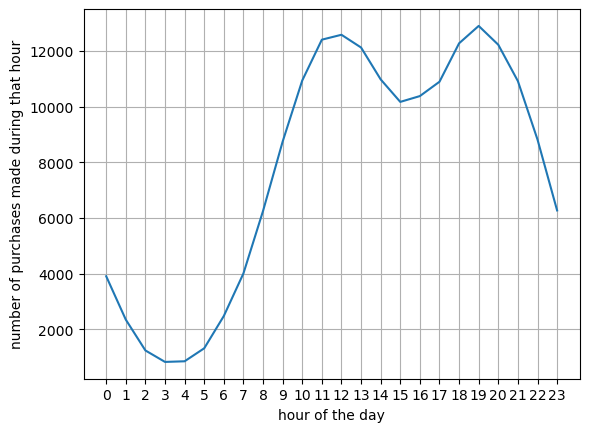

In [83]:
# Plot the hour buying distribution
plt.plot(buy_freq_diffTime.index, buy_freq_diffTime.values)
plt.grid()
plt.xticks(range(0, 24), list(buy_freq_diffTime.index))
plt.xlabel("hour of the day")
plt.ylabel("number of purchases made during that hour")
plt.show()

### Question 4: What products are most often sold together


In [87]:
cleaned_data.head()
cleaned_data.shape

(185950, 12)

In [95]:
buyTwoDiffItems = cleaned_data.merge(cleaned_data, how = 'inner', on = "Order ID", suffixes = ('_first', '_second'))
print(buyTwoDiffItems.shape)

(201770, 23)


In [96]:
buyTwoDiffItems[["Product_first", "Product_second"]].head()

,Product_first,Product_second
0,USB-C Charging Cable,USB-C Charging Cable
1,Bose SoundSport Headphones,Bose SoundSport Headphones
2,Google Phone,Google Phone
3,Google Phone,Wired Headphones
4,Wired Headphones,Google Phone


In [99]:
buyTwoDiffItems = buyTwoDiffItems[buyTwoDiffItems["Product_first"] > buyTwoDiffItems["Product_second"]][["Order ID", "Product_first", "Product_second"]]
buyTwoDiffItems.shape
print(buyTwoDiffItems.head())

    Order ID         Product_first            Product_second
4     176560      Wired Headphones              Google Phone
21    176574  USB-C Charging Cable              Google Phone
39    176586          Google Phone    AAA Batteries (4-pack)
128   176672  USB-C Charging Cable  Lightning Charging Cable
140   176681       ThinkPad Laptop  Apple Airpods Headphones


In [114]:
correlationSummary = buyTwoDiffItems.groupby("Product_first")["Product_second"].value_counts()
print(type(correlationSummary))
removed_less_popular_combinations = correlationSummary[correlationSummary >= 50]
top_purchase_pairs = removed_less_popular_combinations.sort_values(ascending = False).head(100)
print(top_purchase_pairs)

<class 'pandas.core.series.Series'>
Product_first               Product_second            
iPhone                      Lightning Charging Cable      1015
USB-C Charging Cable        Google Phone                   999
iPhone                      Wired Headphones               462
Wired Headphones            Google Phone                   423
iPhone                      Apple Airpods Headphones       373
Vareebadd Phone             USB-C Charging Cable           368
Google Phone                Bose SoundSport Headphones     228
Wired Headphones            USB-C Charging Cable           205
                            Vareebadd Phone                149
                            Lightning Charging Cable       129
Lightning Charging Cable    Apple Airpods Headphones       116
                            AA Batteries (4-pack)          106
USB-C Charging Cable        Bose SoundSport Headphones     102
Wired Headphones            Apple Airpods Headphones       100
USB-C Charging Cable       

In [ ]:
# Video Code
"""
df = cleaned_data[cleaned_data["Order ID"].duplicated(keep = False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head(100)
"""

In [ ]:
# Video Code
"""
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.splie(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

# Find most common three:
count = Counter()

for row in df["Grouped"]:
    row_list = row.splie(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

"""


In [116]:
# Find most Common three using my way
# Remove rows from clean data where only one item is purchased
more_than_one_item_orders = cleaned_data[cleaned_data["Order ID"].duplicated(keep = False)][["Order ID", "Product"]]
three_item_orders = more_than_one_item_orders.merge(more_than_one_item_orders, how = "inner", on = "Order ID", suffixes = ("_1", "_2")).merge(more_than_one_item_orders, how = "inner", on = "Order ID")
three_item_orders = three_item_orders[(three_item_orders["Product_1"]>three_item_orders["Product_2"]) & (three_item_orders["Product_2"] > three_item_orders["Product"])]
three_item_orders.head()



,Order ID,Product_1,Product_2,Product
99,176797,Wired Headphones,Google Phone,Bose SoundSport Headphones
200,177167,iPhone,Apple Airpods Headphones,AAA Batteries (4-pack)
321,177367,USB-C Charging Cable,Google Phone,Bose SoundSport Headphones
526,177800,Wired Headphones,USB-C Charging Cable,Google Phone
656,178158,Wired Headphones,USB-C Charging Cable,Google Phone


In [126]:
three_item_orders_summary = three_item_orders.groupby(["Product_1", "Product_2", "Product"]).size()
three_item_orders_summary = three_item_orders_summary.sort_values(ascending = False)
print(three_item_orders_summary)

Product_1                 Product_2                   Product                   
Wired Headphones          USB-C Charging Cable        Google Phone                  89
iPhone                    Wired Headphones            Lightning Charging Cable      63
                          Lightning Charging Cable    Apple Airpods Headphones      47
USB-C Charging Cable      Google Phone                Bose SoundSport Headphones    35
Wired Headphones          Vareebadd Phone             USB-C Charging Cable          33
iPhone                    Wired Headphones            Apple Airpods Headphones      27
Wired Headphones          Google Phone                Bose SoundSport Headphones    24
Vareebadd Phone           USB-C Charging Cable        Bose SoundSport Headphones    16
Wired Headphones          Vareebadd Phone             Bose SoundSport Headphones     5
                          USB-C Charging Cable        Bose SoundSport Headphones     5
                          Lightning Charging Cabl

### Final Question: What Products Sold the Most and Why?

In [130]:
top_15_most_sold_product = cleaned_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False).head(15)
print(top_15_most_sold_product)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
Name: Quantity Ordered, dtype: int32


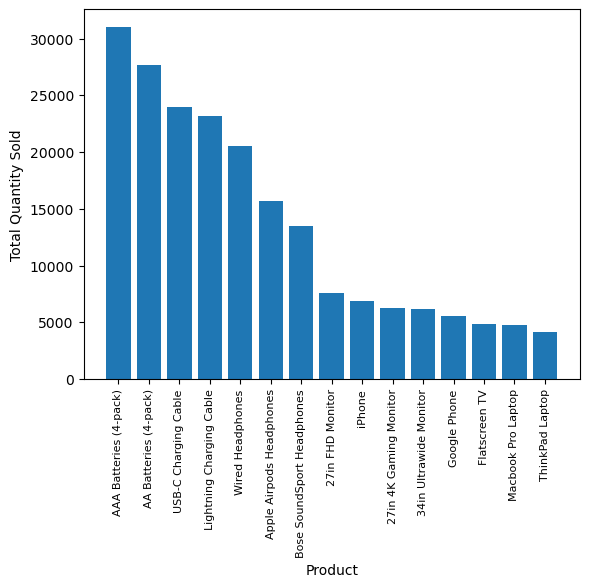

In [135]:
# Plot out the top 15 most sold product in a bar chart
plt.bar(top_15_most_sold_product.index, top_15_most_sold_product.values)
plt.xticks(rotation = "vertical", size = 8)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.show()

In [141]:
num_products_sold = cleaned_data.groupby("Product").sum()["Quantity Ordered"]

print(type(num_products_sold))

<class 'pandas.core.series.Series'>


In [140]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [142]:
prices = cleaned_data.groupby('Product').mean()["Price Each"]

print(type(prices))

<class 'pandas.core.series.Series'>


C:\Users\user\AppData\Local\Temp\ipykernel_6512\2934546532.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(num_products_sold.index, rotation = 'vertical', size = 8)


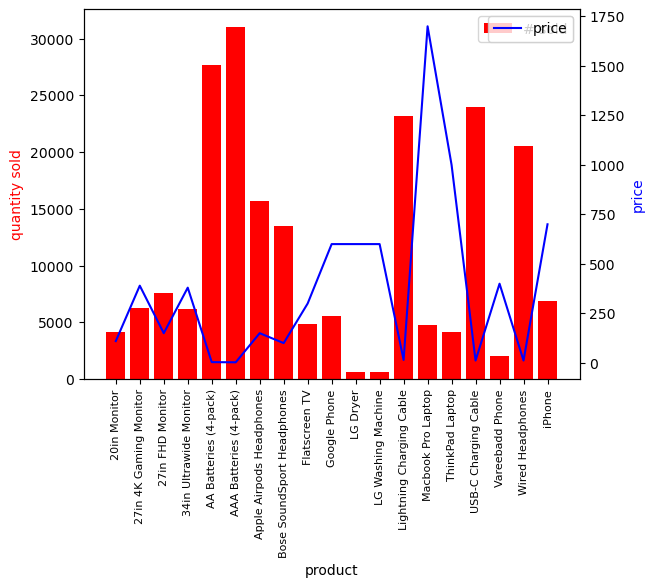

In [173]:
fig, ax = plt.subplots()

ax1 = ax.twinx()
ax.bar(num_products_sold.index, num_products_sold, color = 'r', label = "# sold")
ax1.plot(prices.index, prices, color = "b", label = 'price')

#ax.set_xticks(ticks = num_products_sold.index, labels = nums_products_sold.index, rotation = 'vertical')
ax.set_xlabel("product")
ax.set_ylabel("quantity sold", color = 'r')
ax1.set_ylabel("price", color = 'b')

ax.set_xticklabels(num_products_sold.index, rotation = 'vertical', size = 8)
ax.legend()
ax1.legend()

plt.show()

There could be several reasons why batteries have the highest quantity sold, one of which is that batteries are cheap and has a high variety of use. I made an assumption that higher prices often lead to lower sales which is probably not the only reason, since LG Dryer and LG washing machine have a lower quantity sold than macbook pro laptop and thinkpad laptops despite having a lower price than them.

### Is price and quantity sold correlated

In [181]:
# Step one group the quantity sold by price
quantity_vs_price = cleaned_data.groupby("Price Each").sum()["Quantity Ordered"]
print(quantity_vs_price)

Price Each
2.99       31017
3.84       27635
11.95      23975
11.99      20557
14.95      23217
99.99      13457
109.99      4129
149.99      7550
150.00     15661
300.00      4819
379.99      6199
389.99      6244
400.00      2068
600.00      6844
700.00      6849
999.99      4130
1700.00     4728
Name: Quantity Ordered, dtype: int32


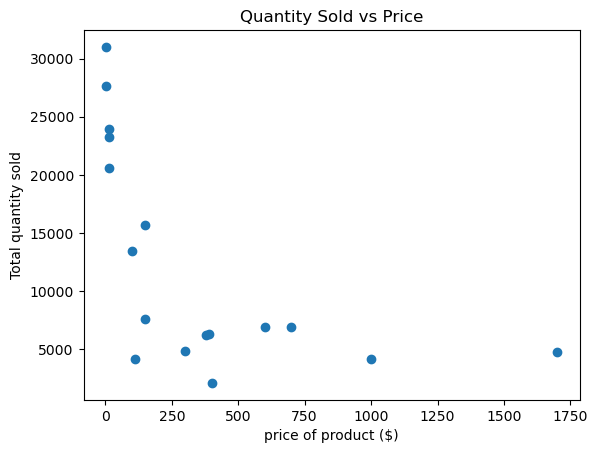

In [182]:
fig, ax = plt.subplots()
ax.scatter(quantity_vs_price.index, quantity_vs_price.values)
ax.set_xlabel("price of product ($)")
ax.set_ylabel("Total quantity sold")
ax.set_title("Quantity Sold vs Price")
plt.show()

From this graph, we can see that products with lower price often tends to have a higher quantity sold. However, even for products in the same price range can have a large difference in sales volume which is likely to be caused by the nature of the product, like headphones probably have a higher quantity sold than hair dryers, this should be further investigated. However, it is undeniable that in general, as price increases, sales volume decreases.

Also, whether something is cheap or not is really subjective, an iphone costing 1000 could be cheap and a JBL earphone costing 500 would be consider expensive. Therefore, price could be one factor, but not the only one, it really depends on the competitor's pricing as well.

However, this insight certainly helps the formation of pricing strategy.